### 라이브러리 및 데이터 수입

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

# 'datasets/national_parks.csv' 파일을 np_data df로 읽어들이기
np_data = pd.read_csv('datasets/national_parks.csv')

In [2]:
# np_data df의 행/열 개수 확인
np_data.shape

(57, 4)

In [3]:
# np_data df에서 무작위 견본 5 행 출력
np_data.sample(5)

,Year,Badlands,GrandCanyon,BryceCanyon
50,2011,870741,4298178,1296000
1,1962,1044800,1447400,251000
18,1979,858000,2131716,558095
43,2004,936030,4326234,987253
28,1989,1237956,3966209,808045


In [4]:
# np_data df에서 주요 통계량 확인
np_data.describe()

# 최소값 및 최대값을 확인하면, 도수분포도의 x축 범위, 눈금, 막대 개수를 가늠할 수 있음

,Year,Badlands,GrandCanyon,BryceCanyon
count,57.000000,5.700000e+01,5.700000e+01,5.700000e+01
mean,1989.000000,1.069524e+06,3.412695e+06,8.408708e+05
std,16.598193,1.574500e+05,1.255127e+06,4.816281e+05
min,1961.000000,8.333000e+05,1.253000e+06,2.510000e+05
25%,1975.000000,9.502420e+05,2.258200e+06,4.715170e+05
50%,1989.000000,1.054325e+06,3.859886e+06,8.080450e+05
75%,2003.000000,1.188700e+06,4.401522e+06,1.081521e+06
max,2017.000000,1.518396e+06,6.254238e+06,2.571684e+06


### Histogram 도수분포도

&#8251; [지수표기법](http://mwultong.blogspot.com/2008/01/exponential-scientific-notation-convert.html) 

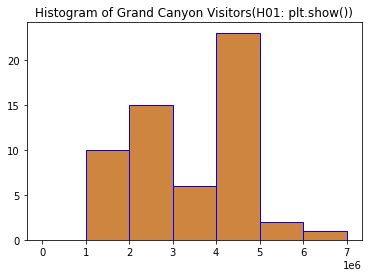

In [5]:
# 그랜드캐년 방문자 수로 도수분포도 그리기
# (0, 7백만) 범위에서 1백만 단위로 구간을 분할하여 작성
plt.hist(np_data['GrandCanyon'], 
         facecolor='peru', 
         edgecolor='blue', 
         range=(0, 7000000),  # x축 범위를 0~7백만으로 지정
         bins=7,  # 구간을 7개로 끊어서 그리라는 뜻
         # x축의 범위와 구간의 크기를 다르게 하면 막대와 눈금이 맞지 않음. (x축 범위 7백만 -> 구간 7)
        )
plt.title('Histogram of Grand Canyon Visitors(H01: plt.show())')
plt.show()
# 실제로는 6 개 막대만 그려졌음

### 히스토그램 차트의 구성 요소
* <b>n:</b> 히스토그램 개별 막대가 표상하는 도수
* <b>bins:</b> 히스토그램 개별 막대가 처리하는 데이터 구간의 중위값
* <b>patches:</b> 개별 막대를 표현하는 직사각형 모습을 표현하는 Patch 객체

n: 	[ 0. 10. 15.  6. 23.  2.  1.]
bins: 	[      0. 1000000. 2000000. 3000000. 4000000. 5000000. 6000000. 7000000.]
patches: <BarContainer object of 7 artists>


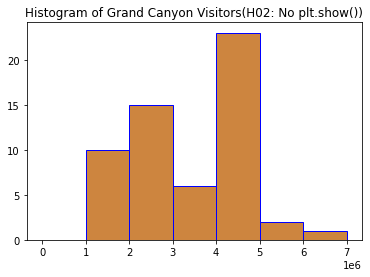

In [6]:
# 히스토그램 차트 구성 요소를 모두 반환받는 방식
n, bins, patches = plt.hist(np_data['GrandCanyon'], 
                            facecolor='peru', 
                            edgecolor='blue', 
                            range=(0, 7000000),  # x축 범위를 0~7백만으로 지정
                            bins=7,
                            )
plt.title('Histogram of Grand Canyon Visitors(H02: No plt.show())')

print(f'n: \t{n}')
print(f'bins: \t{bins}')
print(f'patches: {patches}')

Text(0.5, 1.0, 'Density of Grand Canyon Visitors(H03: Density)')

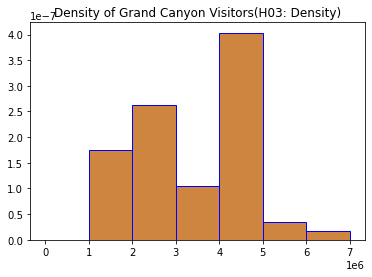

In [7]:
# y 축을 도수(frequency)가 아닌 밀도(density)로 수정
n, bins, patches = plt.hist(np_data['GrandCanyon'],
                            facecolor='peru',
                            edgecolor='blue',
                            range=(0, 7000000),  # x축 범위를 0~7백만으로 지정
                            bins=7,
                            density=True,  # 밀도
                            )
plt.title('Density of Grand Canyon Visitors(H03: Density)')

#### cumulative(누적) 속성
- True 값으로 설정하면, 누적도수분포도를 그려줌
- 막대마다 이전 막대의 도수가 누적되어 표시됨
- 마지막 막대의 도수는 전체 데이터의 도수가 됨

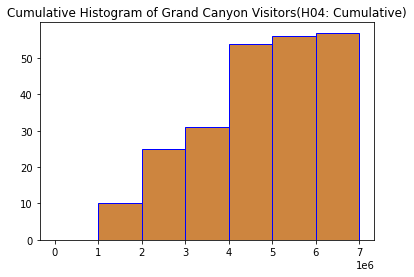

In [8]:
plt.hist(np_data['GrandCanyon'],
         facecolor='peru',
         edgecolor='blue',
         range=(0, 7000000),  # x축 범위를 0~7백만으로 지정
         bins=7,
         cumulative=True,
         )
plt.title('Cumulative Histogram of Grand Canyon Visitors(H04: Cumulative)')
plt.show()

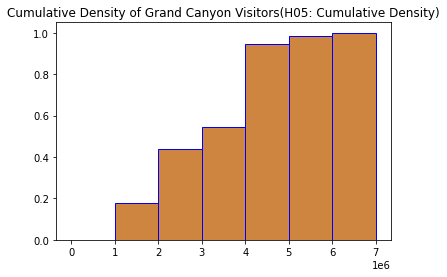

In [9]:
plt.hist(np_data['GrandCanyon'], 
         facecolor='peru', 
         edgecolor='blue', 
         range=(0, 7000000),  # x축 범위를 0~7백만으로 지정
         bins=7,
         cumulative=True,
         density=True,
         )
plt.title('Cumulative Density of Grand Canyon Visitors(H05: Cumulative Density)')
plt.show()

#### 도수분포도에서 값의 범위를 설정
2M ~ 5M 범위로 설정하면 도수분포도의 막대가 재조정 됨

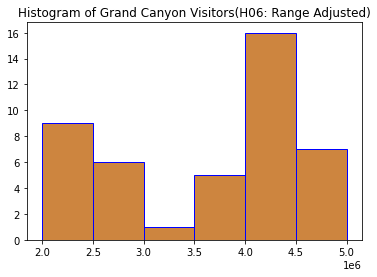

In [10]:
plt.hist(np_data['GrandCanyon'], 
         facecolor='peru', 
         edgecolor='blue', 
         range=(2000000, 5000000),
         bins=6,
        )
plt.title('Histogram of Grand Canyon Visitors(H06: Range Adjusted)')
plt.show()

## Multiple histograms 복수 도수분포도

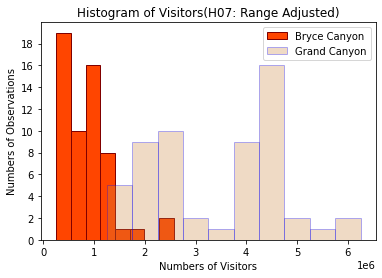

In [11]:
plt.hist(np_data['BryceCanyon'], 
         facecolor='orangered', 
         edgecolor='maroon', 
         bins=8)

plt.hist(np_data['GrandCanyon'], 
         facecolor='peru', 
         edgecolor='blue', 
         bins=10, 
         alpha = 0.3)
plt.title('Histogram of Visitors(H07: Range Adjusted)')
plt.xlabel('Numbers of Visitors')
plt.ylabel('Numbers of Observations')
plt.yticks(np.arange(0, 20, step=2))
plt.legend(['Bryce Canyon', 'Grand Canyon'])

plt.show()

## Experiment with 2d Histogram similar to plotting points i.e plt.plot(x,y)

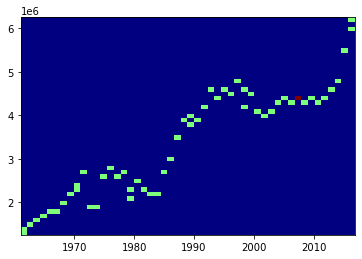

In [12]:
# Big bins
plt.hist2d(np_data['Year'], np_data['GrandCanyon'], bins=(50, 50), cmap=plt.cm.jet)
plt.show()


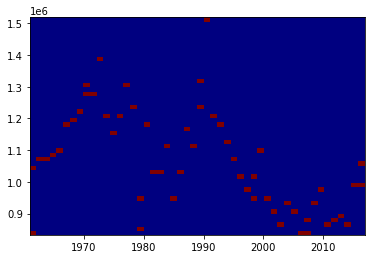

In [13]:
# Big bins
plt.hist2d(np_data['Year'], np_data['Badlands'], bins=(50, 50), cmap=plt.cm.jet)
plt.show()

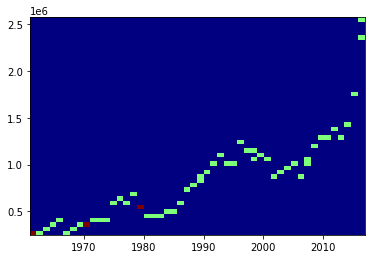

In [14]:
# Big bins
plt.hist2d(np_data['Year'], np_data['BryceCanyon'], bins=(50, 50), cmap=plt.cm.jet)
plt.show()